#    Risco de Crédito

### Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de default. 

Sua tarefa será realizar uma análise descritiva e tratamento dos dados para entender o perfil dos clientes e quais fatores podem influenciar no risco de crédito. 

In [1]:
#pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## Importando o arquivo

In [3]:
df = pd.read_csv("risco_credito.csv")
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


## Analisando os dados 

In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(df)
## Default - true mal pagadora
##           false bom pagador

DATASET SHAPE:  (64592, 10) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB
None

 -----------------------------------------------

<AxesSubplot:>

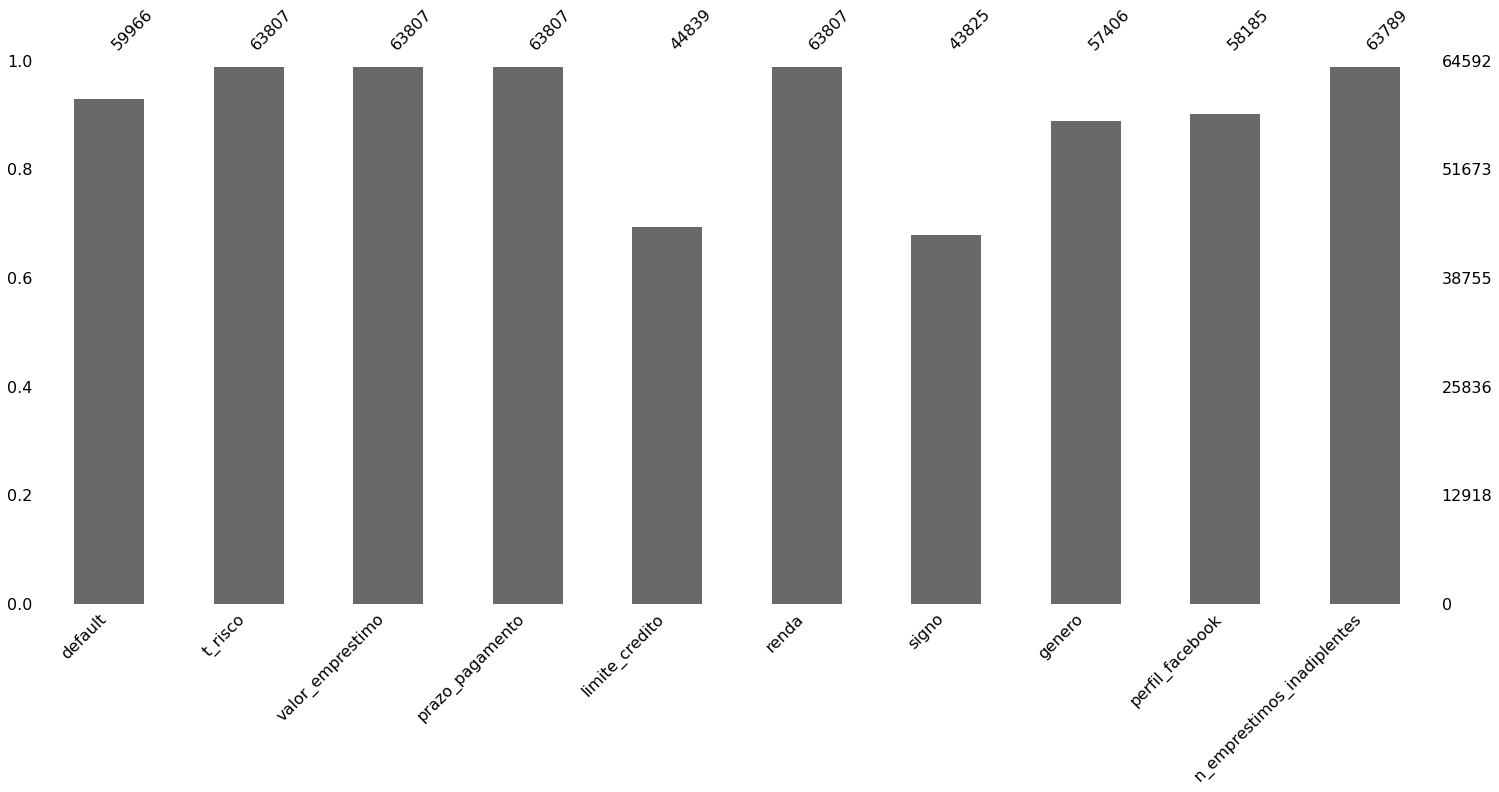

In [5]:
msno.bar(df)

## Tratamento dos dados 

1.) Exclusão das linhas referentes a default que estão nulas

In [6]:
df = df.dropna(subset=['default'])

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.29,0.10,0.00,0.22,0.29,0.36,0.90
valor_emprestimo,59966.0,13411.81,7957.40,527.07,7225.99,12012.40,18036.64,35059.60
prazo_pagamento,59966.0,40.67,9.50,36.00,36.00,36.00,36.00,60.00
limite_credito,41187.0,34093.01,36783.48,0.00,9907.00,25338.00,46759.50,613117.00
renda,59966.0,71325.78,51691.43,4821.18,44027.86,60047.26,85039.61,5000027.83
n_emprestimos_inadiplentes,59948.0,0.00,0.08,0.00,0.00,0.00,0.00,5.00


2.) Substituindo ds valores faltantes do limite de crédito e do número de empréstimos com inadimplência pela mediana.

In [8]:
valores_preenchimento = {'limite_credito': df['limite_credito'].median(),
                         'n_emprestimos_inadiplentes': df['n_emprestimos_inadiplentes'].median()}
df = df.fillna(value = valores_preenchimento)
df.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.29,0.10,0.00,0.22,0.29,0.36,0.90
valor_emprestimo,59966.0,13411.81,7957.40,527.07,7225.99,12012.40,18036.64,35059.60
prazo_pagamento,59966.0,40.67,9.50,36.00,36.00,36.00,36.00,60.00
limite_credito,59966.0,31351.28,30753.70,0.00,17316.50,25338.00,35125.00,613117.00
renda,59966.0,71325.78,51691.43,4821.18,44027.86,60047.26,85039.61,5000027.83
n_emprestimos_inadiplentes,59966.0,0.00,0.08,0.00,0.00,0.00,0.00,5.00


## Análise Exploratória

### 1.) Variáveis Qualitativas

In [9]:
variavel_nominal = ['object', 'bool']
atributos_qualitativos = list(df.select_dtypes(include= variavel_nominal).columns)
atributos_qualitativos

['default', 'signo', 'genero', 'perfil_facebook']

In [10]:
df_qualitativas = df[atributos_qualitativos]
df_qualitativas.head()

,default,signo,genero,perfil_facebook
0,False,virg,f,True
1,False,sagi,f,False
2,False,libr,m,True
3,False,NaN,m,False
4,False,libr,m,NaN


default


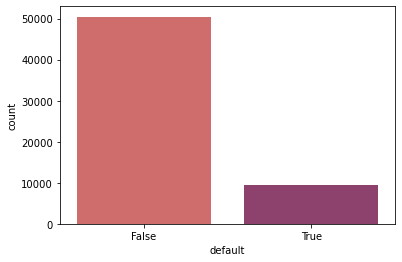

signo


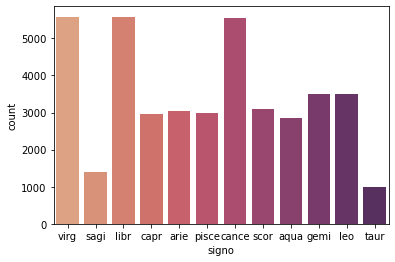

genero


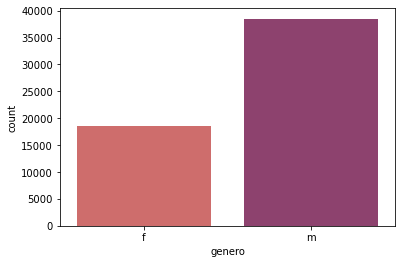

perfil_facebook


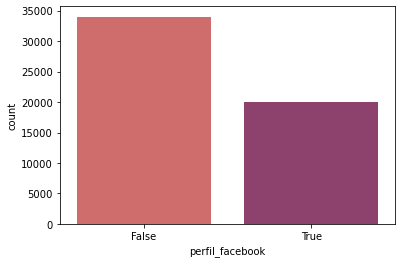

In [11]:
for variavel_nominal in df_qualitativas:
    print(variavel_nominal)
    sns.countplot(df_qualitativas[variavel_nominal], palette= 'flare')
    plt.show()

**Primeira análise exploratória
Considerações para o tratamento de dados:**
1. Signo, excluir do nosso Data Frame por possuir 31% de dados desconhecidos.
2. Genero, o desconhecido será substituido por masculino.
3. Perfil_facebook, o desconhecido será substituido por 'False'

**1.) Excluindo a variável qualitativa - Signo**

In [12]:
df['signo'].value_counts(normalize=True)

libr     0.136053
virg     0.135785
cance    0.135054
leo      0.085478
gemi     0.085283
scor     0.075339
arie     0.074218
pisce    0.072926
capr     0.072097
aqua     0.069197
sagi     0.034172
taur     0.024398
Name: signo, dtype: float64

In [13]:
df.isnull().sum()

default                           0
t_risco                           0
valor_emprestimo                  0
prazo_pagamento                   0
limite_credito                    0
renda                             0
signo                         18938
genero                         2996
perfil_facebook                5971
n_emprestimos_inadiplentes        0
dtype: int64

In [14]:
df = df.drop(columns=['signo'])
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,25338.0,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,25338.0,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,25338.0,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,NaN,0.0


**2.) Substituindo as qualitativas pela moda**

In [15]:
df['genero'].value_counts(normalize=True)

m    0.675742
f    0.324258
Name: genero, dtype: float64

In [16]:
df['perfil_facebook'].value_counts(normalize=True)

False    0.629632
True     0.370368
Name: perfil_facebook, dtype: float64

In [17]:
df['genero'] = df['genero'].fillna(df['genero'].mode()[0])
df['perfil_facebook'] = df['perfil_facebook'].fillna(df['perfil_facebook'].mode()[0])

In [18]:
df.isnull().sum()

default                       0
t_risco                       0
valor_emprestimo              0
prazo_pagamento               0
limite_credito                0
renda                         0
genero                        0
perfil_facebook               0
n_emprestimos_inadiplentes    0
dtype: int64

In [19]:
variavel_nominal = ['object', 'bool']
atributos_qualitativos = list(df.select_dtypes(include= variavel_nominal).columns)
atributos_qualitativos

['default', 'genero', 'perfil_facebook']

In [20]:
df_qualitativas = df[atributos_qualitativos]
df_qualitativas.head()

,default,genero,perfil_facebook
0,False,f,True
1,False,f,False
2,False,m,True
3,False,m,False
4,False,m,False


default


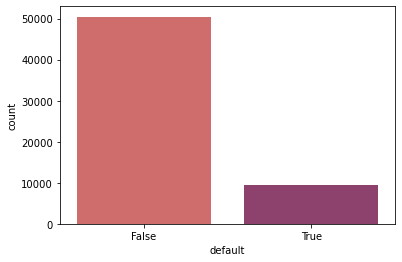

genero


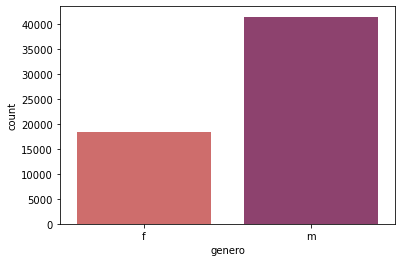

perfil_facebook


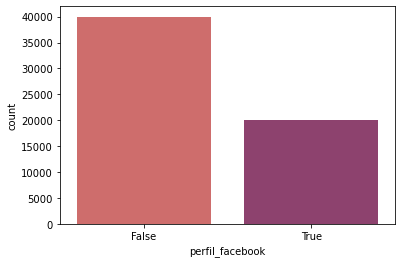

In [21]:
for variavel_nominal in df_qualitativas:
    print(variavel_nominal)
    sns.countplot(df_qualitativas[variavel_nominal], palette= 'flare')
    plt.show()

**Segunda análise exploratória
1.) A variável resposta (Default) possui classes desbalanceadas.**

In [22]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(df)

DATASET SHAPE:  (59966, 9) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     59966 non-null  float64
 2   valor_emprestimo            59966 non-null  float64
 3   prazo_pagamento             59966 non-null  float64
 4   limite_credito              59966 non-null  float64
 5   renda                       59966 non-null  float64
 6   genero                      59966 non-null  object 
 7   perfil_facebook             59966 non-null  bool   
 8   n_emprestimos_inadiplentes  59966 non-null  float64
dtypes: bool(1), float64(6), object(2)
memory usage: 4.2+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

default

In [23]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
valor_emprestimo,59966.0,13412.0,7957.0,527.0,7226.0,12012.0,18037.0,35060.0
prazo_pagamento,59966.0,41.0,10.0,36.0,36.0,36.0,36.0,60.0
limite_credito,59966.0,31351.0,30754.0,0.0,17316.0,25338.0,35125.0,613117.0
renda,59966.0,71326.0,51691.0,4821.0,44028.0,60047.0,85040.0,5000028.0
n_emprestimos_inadiplentes,59966.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


### 2.) Variáveis Quantitativas

1. A taxa de risco teve um pico em torno do 0.30.
2. 75% solicitaram empréstimos até 18.036,60
3. 75% tem limite de crédito de 35.125,00 e com valor máximo de 613.117,00
4. 75% tem renda até 85040,40
3. 75% não foram inadimplentes com empréstimos.

In [24]:
variavel_quantitativa = ['float64']
atributos_quantitativos = list(df.select_dtypes(include= variavel_quantitativa).columns)
atributos_quantitativos

['t_risco',
 'valor_emprestimo',
 'prazo_pagamento',
 'limite_credito',
 'renda',
 'n_emprestimos_inadiplentes']

In [25]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(df)

DATASET SHAPE:  (59966, 9) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     59966 non-null  float64
 2   valor_emprestimo            59966 non-null  float64
 3   prazo_pagamento             59966 non-null  float64
 4   limite_credito              59966 non-null  float64
 5   renda                       59966 non-null  float64
 6   genero                      59966 non-null  object 
 7   perfil_facebook             59966 non-null  bool   
 8   n_emprestimos_inadiplentes  59966 non-null  float64
dtypes: bool(1), float64(6), object(2)
memory usage: 4.2+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

default

In [26]:
df_quantitativas = df[atributos_quantitativos]
df_quantitativas.head()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
0,0.43,20024.31,60.0,62386.0,59869.05,0.0
1,0.23,10046.51,36.0,25338.0,46016.31,0.0
2,0.30,21228.25,60.0,25338.0,48025.47,0.0
3,0.15,23032.33,36.0,25338.0,46011.12,0.0
4,0.08,24026.29,36.0,32366.0,90026.17,0.0


t_risco


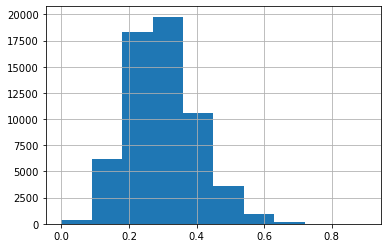

valor_emprestimo


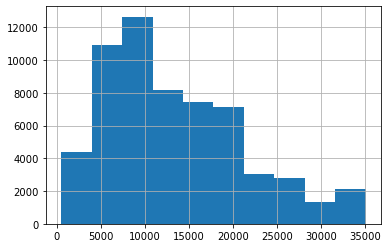

prazo_pagamento


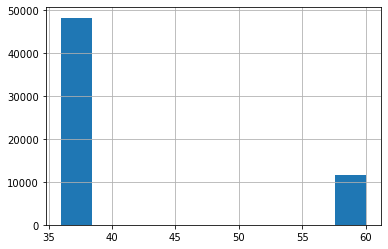

limite_credito


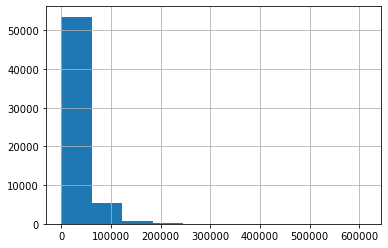

renda


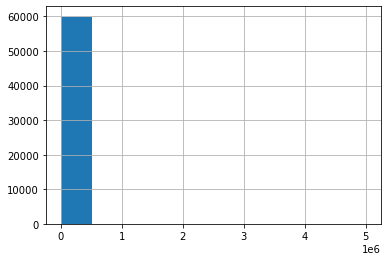

n_emprestimos_inadiplentes


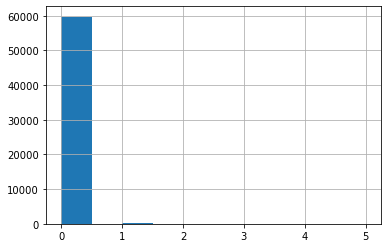

In [27]:
for variavel_quantitativa in df_quantitativas:
    print(variavel_quantitativa)
    df_quantitativas[variavel_quantitativa].hist(bins=10)
    plt.show()

## Análise Bivariada

<AxesSubplot:xlabel='perfil_facebook', ylabel='count'>

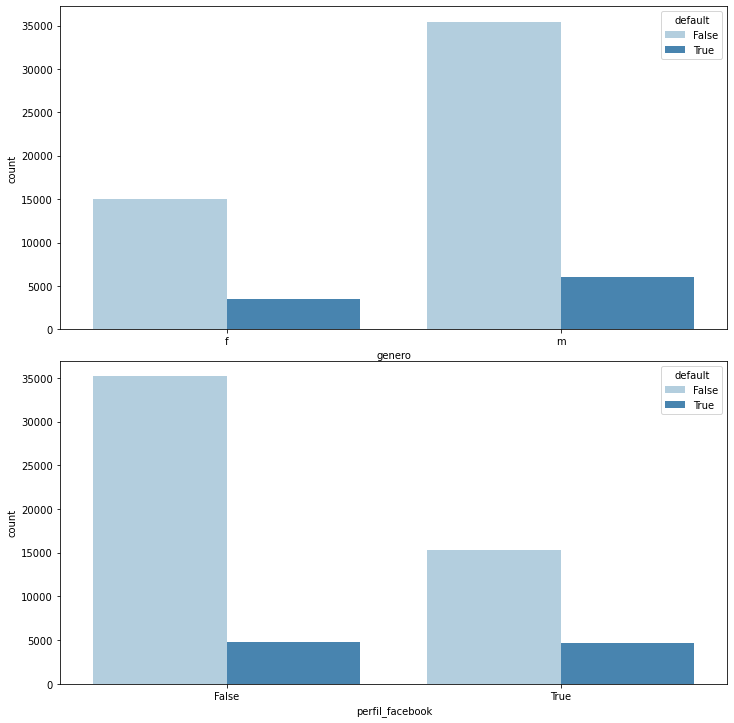

In [28]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
plt.tight_layout()

sns.countplot(df['genero'], hue=df.default, ax=ax[0], palette='Blues')
sns.countplot(df['perfil_facebook'], hue=df.default, ax=ax[1], palette='Blues')


**Não há diferenças entre os clientes com risco de não pagar o empréstimo com gênero ou existência de perfil no Facebook**

t_risco


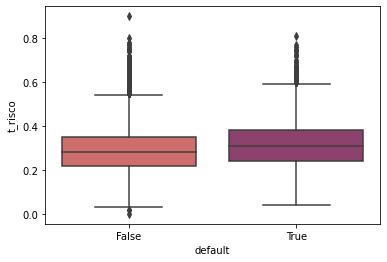

valor_emprestimo


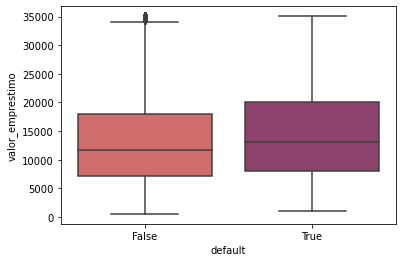

prazo_pagamento


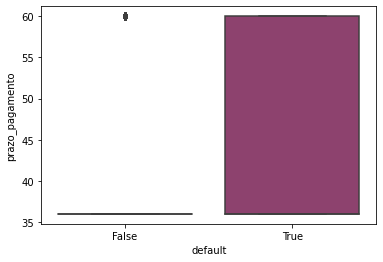

limite_credito


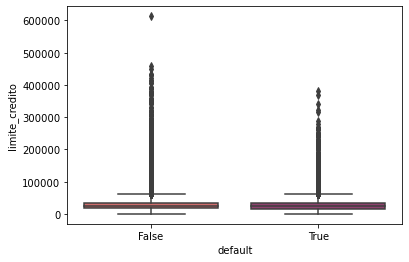

renda


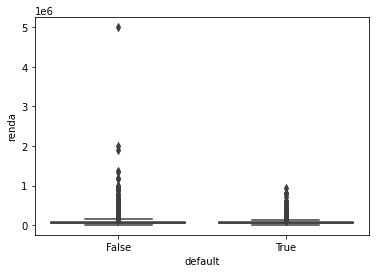

n_emprestimos_inadiplentes


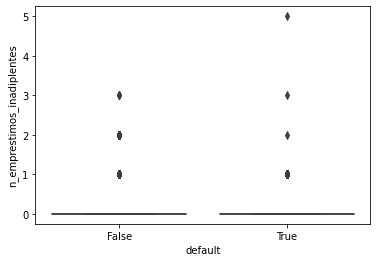

In [29]:
for variavel_quantitativa in df_quantitativas:
    print(variavel_quantitativa)
    sns.boxplot(y=df_quantitativas[variavel_quantitativa], x= 'default', data=df, palette='flare')
    plt.show()

<AxesSubplot:title={'center':'Correlação entre os atributos'}>

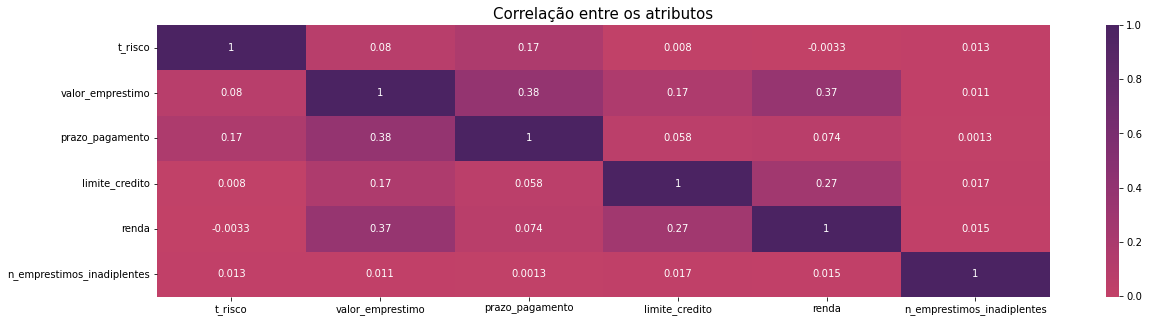

In [30]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre os atributos', size= 15)
sns.heatmap(df_quantitativas.corr(), cmap='flare', center= 0, annot= True)
## precisa ser verificado se existe correlação entre as variáveis, 
## no gráfico abaixo não existe nenhuma correlação entre as variáveis


In [31]:
va_correlacao = df[['default','t_risco','valor_emprestimo','prazo_pagamento','limite_credito', 'renda', 'n_emprestimos_inadiplentes']]
va_correlacao.corr()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
t_risco,1.000000,0.080007,0.173742,0.008034,-0.003311,0.012714
valor_emprestimo,0.080007,1.000000,0.381454,0.171828,0.368504,0.010771
prazo_pagamento,0.173742,0.381454,1.000000,0.058470,0.073706,0.001312
limite_credito,0.008034,0.171828,0.058470,1.000000,0.267614,0.017326
renda,-0.003311,0.368504,0.073706,0.267614,1.000000,0.015338
n_emprestimos_inadiplentes,0.012714,0.010771,0.001312,0.017326,0.015338,1.000000


<Figure size 1080x504 with 0 Axes>

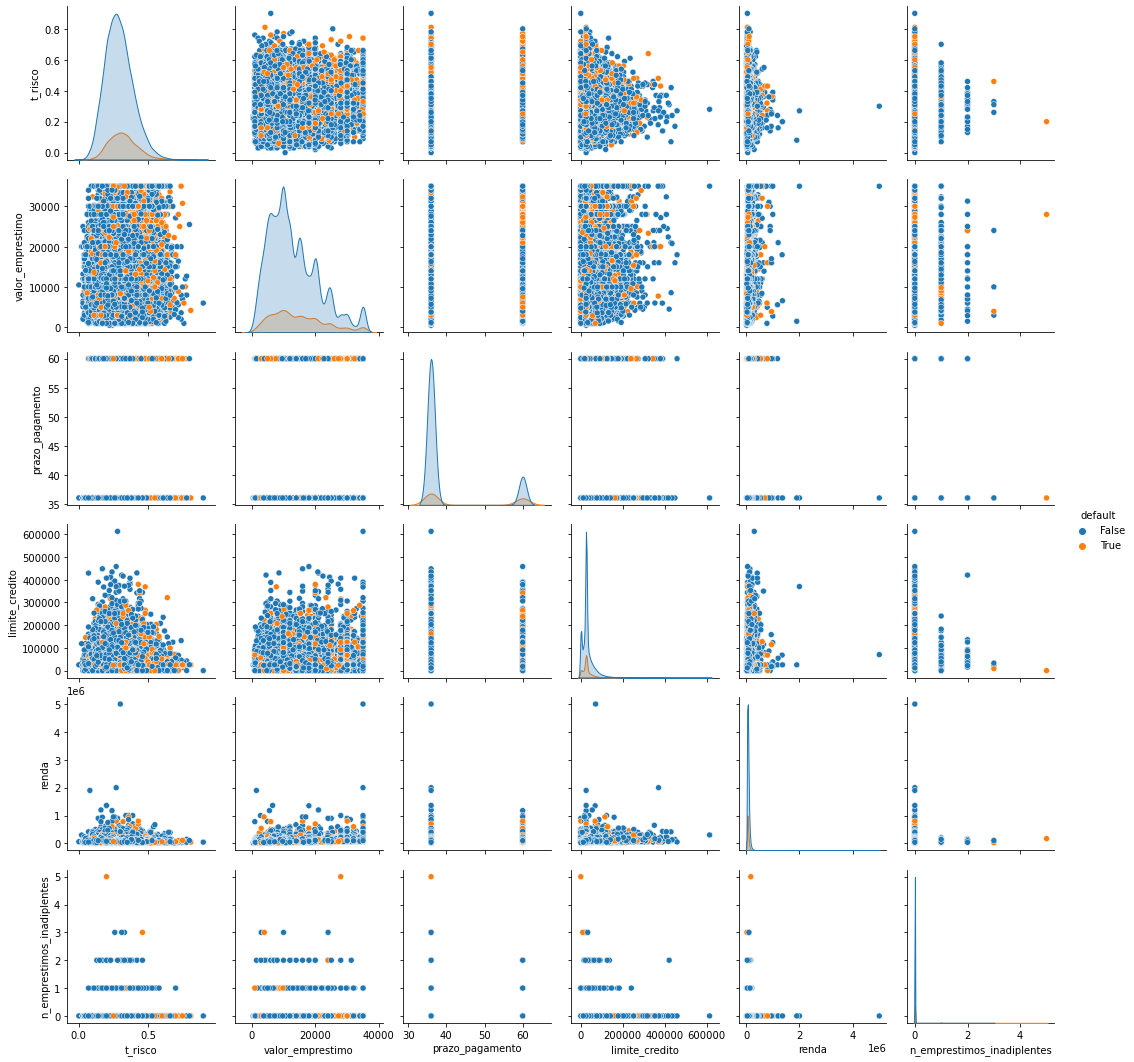

In [32]:
plt.figure(figsize=(15,7))
sns.pairplot(data= va_correlacao, hue= 'default')

In [33]:
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,25338.0,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,25338.0,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,25338.0,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,False,0.0


### Transformando em variáveis binárias

In [34]:
df = pd.get_dummies(df, columns= ['prazo_pagamento', 'genero', 'perfil_facebook', 'default'], drop_first= True)

In [35]:
df.head()

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,prazo_pagamento_60.0,genero_m,perfil_facebook_True,default_True
0,0.43,20024.31,62386.0,59869.05,0.0,1,0,1,0
1,0.23,10046.51,25338.0,46016.31,0.0,0,0,0,0
2,0.30,21228.25,25338.0,48025.47,0.0,1,1,1,0
3,0.15,23032.33,25338.0,46011.12,0.0,0,1,0,0
4,0.08,24026.29,32366.0,90026.17,0.0,0,1,0,0


### Substituindo outlier por quantil

<AxesSubplot:xlabel='default_True', ylabel='t_risco'>

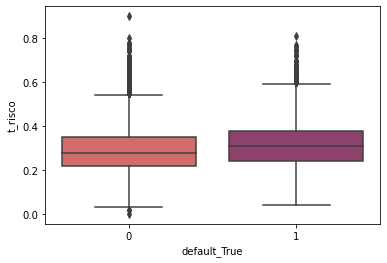

In [36]:
sns.boxplot(data=df, x="default_True", y="t_risco",palette='flare')

In [37]:
out_max = df['t_risco'].quantile(0.975)
out_max

0.51

In [38]:
df.loc[df['t_risco'] > out_max] = 'out_max'
df['t_risco'] = pd.to_numeric(df['t_risco'],errors = 'coerce')

In [39]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(df)

DATASET SHAPE:  (59966, 9) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   t_risco                     58487 non-null  float64
 1   valor_emprestimo            59966 non-null  object 
 2   limite_credito              59966 non-null  object 
 3   renda                       59966 non-null  object 
 4   n_emprestimos_inadiplentes  59966 non-null  object 
 5   prazo_pagamento_60.0        59966 non-null  object 
 6   genero_m                    59966 non-null  object 
 7   perfil_facebook_True        59966 non-null  object 
 8   default_True                59966 non-null  object 
dtypes: float64(1), object(8)
memory usage: 4.6+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

t_risco         

In [40]:
out_min = df['t_risco'].quantile(0.025)
out_min

0.12

In [41]:
df.loc[df['t_risco'] < out_min, 't_risco'] = 'out_min'
df['t_risco'] = pd.to_numeric(df['t_risco'],errors = 'coerce')

<AxesSubplot:xlabel='default_True', ylabel='t_risco'>

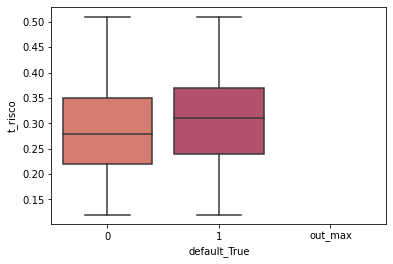

In [42]:
sns.boxplot(data=df, x="default_True", y="t_risco",palette='flare')